In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma as Gamma
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import datetime
import matplotlib as mpl
import math
import time as tm
import matplotlib.ticker
import matplotlib.ticker as ticker
import scipy
from tabulate import tabulate
from astropy.stats import histogram
import re
import random
import json
import os


#%matplotlib inline








#timestamp
now = datetime.datetime.now()        
timestamp = now.isoformat()

###Global stuff
debugging = False
elCh =  1.602176620898*10**(-19) 
SPINE_COLOR = "grey"
color_Arctic='#AEC7E8'
color_Nectarine='#FFBB78'
color_Dark_Blue='#1F77B4'

#use tab:red for tableau colors...other tab colors (20 in total):
tab20_colors=['#9edae5','#17becf','#dbdb8d','#bcbd22','#c7c7c7','#7f7f7f','#f7b6d2','#e377c2','#c49c94','#8c564b','#c5b0d5','#9467bd','#ff9896','#d62728','#98df8a','#2ca02c','#ffbb78','#ff7f0e','#aec7e8','#1f77b4']

def latexify(fig_width=None, ratio = (math.sqrt(5)-1.0)/2.0 ,fig_height=None):
    fig_width_pt = 455.24413     # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0#.27  # Convert pt to inch

    if fig_width is None:
        fig_width = fig_width_pt*inches_per_pt
    elif fig_width is not None:
        fig_width = fig_width_pt*inches_per_pt*fig_width
    elif fig_height is None:
        fig_width = fig_width*fig_width_pt*inches_per_pt

    if fig_height is None:
        #golden_mean = 0.8
        golden_mean = ratio# Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 10.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
                 "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES
    matplotlib.rc('axes',edgecolor="#595959")
    params = {
          #'backend': 'ps',
          #'text.latex.preamble': ['\usepackage{gensymb}'],
          'axes.labelsize': 10, # fontsize for x and y labels (was 10)
          'axes.titlesize': 11,
          'font.size':       10, # was 10
          'legend.fontsize': 10, # was 10
          'xtick.labelsize': 9,
          'ytick.labelsize': 9,
          'text.usetex': True,
          'pgf.texsystem': "pdflatex",
          'figure.figsize': [fig_width,fig_height],
          'font.family': "serif",
          'font.serif': ['Computer Modern Roman'],  # blank entries should cause plots to inherit fonts from the document
          'font.sans-serif': ['Computer Modern Sans serif']
        }
        
    matplotlib.rcParams.update(params)

    

def makeaplot(logscale = False ,grid = True, axisoff = False,xlim=[0,0],ylim=[0,0],xlabel='a',ylabel='a',plotnumber=111):
    global ax,fig
    #fig = plt.figure()
    
    if plotnumber!=111:
        ax = fig.add_subplot(plotnumber)
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    
    plt.rc('text',usetex='True')
    plt.rc('axes',edgecolor="#595959")
    ax.spines["bottom"].set_color(SPINE_COLOR)
    ax.spines["bottom"].set_linewidth(0.5)
    ax.spines["left"].set_color(SPINE_COLOR)
    ax.spines["left"].set_linewidth(0.5)
    ax.spines["right"].set_color(SPINE_COLOR)
    ax.spines["right"].set_linewidth(0.5)
    ax.spines["top"].set_color(SPINE_COLOR)
    ax.spines["top"].set_linewidth(0.5)
    
    

    params = {
          #'backend': 'ps',
          #'text.latex.preamble': ['\usepackage{gensymb}'],
          'text.usetex': True,
          'pgf.texsystem': "pdflatex",
          'font.family': "serif",
          'font.serif': ['Computer Modern Roman'], 
          'font.sans-serif': ['Computer Modern Sans serif']
        }

        
    matplotlib.rcParams.update(params)


    if logscale:
        plt.yscale('log', nonposy='clip')
    if grid:
        plt.grid(color = "#595959", linestyle='dotted', lw = 0.8, alpha = 0.8)
        plt.rc('axes', axisbelow=True)#xy
    if axisoff:
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
    if xlim != [0,0]:
        plt.xlim(xlim[0],xlim[1])
    if ylim != [0,0]:
        plt.ylim(ylim[0],ylim[1])
    if xlabel != 'a':
        plt.xlabel(xlabel)
    if ylabel != 'a':
        plt.ylabel(ylabel)

        
      
def finishplot(legend = True,legendabove=False,filename = 'a',secondaxis=[0,0,'0',False],latex=1,transparant=False,png=False,showit=True):
    if legend:
        plt.legend(framealpha=1,loc=0,ncol=1,fancybox=True)
    if legendabove:
        plt.legend(bbox_to_anchor=(0,1.001,1,0.2), loc="lower left",    mode="expand", borderaxespad=0, ncol=3)
       
    if secondaxis != [0,0,'0',False]:
       
        ax2 = ax.twiny()
        x_ax2_min = secondaxis[0]
        x_ax2_max = secondaxis[1]
        ax2.set_xlim(x_ax2_min,x_ax2_max) #hier die Ticks!
        ax2.xaxis.set_ticks_position("bottom") #runter damit
        ax2.xaxis.set_label_position("bottom") #runter damit
        ax2.spines["bottom"].set_position(("axes", -0.195)) #offset nach unten
        ax2.spines["bottom"].set_color(SPINE_COLOR)
        ax2.spines["bottom"].set_linewidth(0.5)
        ax2.set_frame_on(True)
        ax2.patch.set_visible(False)
        for sp in ax2.spines.itervalues():
            sp.set_visible(False)
        ax2.spines["bottom"].set_visible(True)
        ax2.set_xlabel(secondaxis[2])
       
       
       
        if secondaxis[3]:
            ax2.set_xscale('log')  
     
    if latex!=1:
        latexify(fig_width=latex)
   
    plt.tight_layout()
    if filename != 'a' and png==True:
        plt.savefig('{}.PNG'.format(filename), dpi = 1000, bbox_inches='tight')
    elif filename != 'a' and transparant==True:
        plt.savefig('{}.PNG'.format(filename), dpi = 1000, bbox_inches='tight',transparant=True)
    elif filename != 'a':
        plt.savefig('{}.pdf'.format(filename), dpi = 1000, bbox_inches='tight')
    
    if showit:
        plt.show()
    
def MyChiSq(y,yfit):
    yresid = y - yfit
    SSresid = sum(pow(yresid,2))
    SStotal = len(y) * np.var(y)
    chiSq_d = 1 - SSresid/SStotal



def poissonexpectation(t,height,mu):
    return height*mu * np.exp(- mu * t)    

def logpoissonexpectation(t,height,mu):
    return height*mu *10**t *np.log(10) * np.exp(- mu *10**t)   

def gaussian(x,height,mean,sigma):
    return height*np.exp(- (x-mean)**2 / (2*sigma**2))

def gaussianwithbase(x,height,base,mean,sigma):
    return height*np.exp(- (x-mean)**2 / (2*sigma**2))+base

def linfit(x,a,b):
    return a*x + b


def readdeltat(filepath,totzeit = 20*10**-9,samplerange=5*10**-3):
    dummyampcounter=0
    dummyallcounter=0
    #readin
    Zeilencounter=1
    filepath   
    amp=[]
    charge=[]
    time=[]
    delta_t=[]
    Totzeit_Pulse=[]
    rate_Tot=[]
    #read each line (giant string), seperate at tab, get chagre/time/amp and convert to float
    with open(filepath) as fp:  
        for cnt, line in enumerate(fp):
            a = re.split(r'\t+', line) 

            #get charge/amp/time at each 3rd iteration respectively
            j=0
            trashamp=[]
            trashcharge=[]
            trashtime=[]

            for i in range(0,len(a)-1):    
                if j==0:
                    trashcharge.append(float(a[i]))
                elif j==1:
                    nowamp=float(a[i])
                    trashamp.append(nowamp)                 
                elif j==2:
                    #time as in the file
                    nowtime = float(a[i])
                    trashtime.append(nowtime) 
                    #print 'Time:',nowtime *10**3   
                else: 
                    print('error...')
                j+=1
                if j==3:
                    j=0
            #each time/amp/charge of the line is now in trashXXX array. Now sort and get delta t

            #convert
            trashamp =  np.array(trashamp)       
            trashtime =  np.array(trashtime) #into ms
            trashcharge =  np.array(trashcharge)#*1e12/50. #into pC
            
            #sort out shit...big puls amp information is dumb (range is from -195 to 200). Bigger puls cant be recorded. BUT IT IS STILL THERE, so purely for rate dont sort it out
            '''
            cond = trashamp < 180#+195
            dummyallcounter+=1
            if abs(len(trashamp) -  len(trashamp[cond]) )>0:
                dummyampcounter+=1
            trashamp =  trashamp[cond]              
            trashtime =  trashtime[cond]
            trashcharge =  trashcharge[cond]
            '''
            
            #sort out if two amps in a line are equal
            newamp=[]
            newtime=[]
            newcharge=[]
            #make new array only without double amps
            index=0
            for check in trashamp:
                if check not in newamp: #when the amp is not in the array yet, add everything
                    newamp.append(check)
                    newtime.append(trashtime[index])
                    newcharge.append(trashcharge[index])
                #elif check in newamp:
                    #print 'double here'            
                index+=1

                
                
            #sort out if there is only one pulse...else we cant get delta t
            if len(newamp)==1:
                #print 'too small'
                newamp=[]
                newtime=[]
                newcharge=[]

            #get delta t...difference of next neighbor 
            delta_t_thisline=[]
            for i in range(0,len(newtime)-1):
                dt = newtime[i+1]-newtime[i]
                if dt > 5e-9: #if > 5ns (set pico limit) include
                    delta_t.append(dt)
                    delta_t_thisline.append(dt)
                    
           
            #give sorted line values to global/total values
            for z in range(0,len(newamp)):
                charge.append(newcharge[z])
                amp.append(newamp[z])
                time.append(newtime[z])

                
            
            #rate berechnen und totzeit (def oben) aussortieren 
            numpy_delta_t = np.array(delta_t_thisline)
            tote_pulse = (numpy_delta_t[numpy_delta_t<totzeit]).size
            anzahl_pulse_mit_totzeit = trashtime.size - tote_pulse

            #rate nach je x zeilen    
            Totzeit_Pulse.append(anzahl_pulse_mit_totzeit)  #save number of pulses for each line
            
            Zeilencounter+=1      
    rate=sum(Totzeit_Pulse)   /(Zeilencounter*samplerange)
    rate_err=np.sqrt(sum(Totzeit_Pulse) )/(Zeilencounter*samplerange)
       
                    
    #print 'Amp > 180:',dummyampcounter, "/",dummyallcounter
            
    #convert 
    delta_t = np.array(delta_t)
    log_delta_t = np.log10(delta_t)
    charge=np.array(charge)
    amp=np.array(amp)
    time=np.array(time)
    
    return charge, amp, time, delta_t,log_delta_t,rate,rate_err


def readdeltat2(filepath,totzeit = 20*10**-9,samplerange=5*10**-3):
    dummyampcounter=0
    dummyallcounter=0
    #readin
    Zeilencounter=1
    filepath   
    amp=[]
    charge=[]
    time=[]
    delta_t=[]
    Totzeit_Pulse=[]
    rate_Tot=[]
    #read each line (giant string), seperate at tab, get chagre/time/amp and convert to float
    with open(filepath) as fp:  
        for cnt, line in enumerate(fp):
            a = re.split(r'\t+', line) 

            #get charge/amp/time at each 3rd iteration respectively
            j=0
            trashamp=[]
            trashcharge=[]
            trashtime=[]

            for i in range(0,len(a)-1):    
                if j==0:
                    trashcharge.append(float(a[i]))
                elif j==1:
                    nowamp=float(a[i])
                    trashamp.append(nowamp)                 
                elif j==2:
                    #time as in the file
                    nowtime = float(a[i])
                    trashtime.append(nowtime) 
                    #print 'Time:',nowtime *10**3   
                else: 
                    print('error...')
                j+=1
                if j==3:
                    j=0
            #each time/amp/charge of the line is now in trashXXX array. Now sort and get delta t

            #convert
            trashamp =  np.array(trashamp)       
            trashtime =  np.array(trashtime) #into ms
            trashcharge =  np.array(trashcharge)#*1e12/50. #into pC
            
            #sort out shit...big puls amp information is dumb (range is from -195 to 200). Bigger puls cant be recorded. BUT IT IS STILL THERE, so purely for rate dont sort it out
            '''
            cond = trashamp < 180#+195
            dummyallcounter+=1
            if abs(len(trashamp) -  len(trashamp[cond]) )>0:
                dummyampcounter+=1
            trashamp =  trashamp[cond]              
            trashtime =  trashtime[cond]
            trashcharge =  trashcharge[cond]
            '''
            
            #sort out if two amps in a line are equal
            newamp=[]
            newtime=[]
            newcharge=[]
            #make new array only without double amps
            index=0
            for check in trashamp:
                if check not in newamp: #when the amp is not in the array yet, add everything
                    newamp.append(check)
                    newtime.append(trashtime[index])
                    newcharge.append(trashcharge[index])
                #elif check in newamp:
                    #print 'double here'            
                index+=1

                
           
            #give sorted line values to global/total values
            for z in range(0,len(newamp)):
                charge.append(newcharge[z])
                amp.append(newamp[z])
                time.append(newtime[z])

                
            
            #rate berechnen und totzeit (def oben) aussortieren 
            #numpy_delta_t = np.array(delta_t_thisline)
            #tote_pulse = (numpy_delta_t[numpy_delta_t<totzeit]).size
            anzahl_pulse_mit_totzeit = trashtime.size #- tote_pulse

            #rate nach je x zeilen    
            Totzeit_Pulse.append(anzahl_pulse_mit_totzeit)  #save number of pulses for each line
            
            Zeilencounter+=1      
    rate=sum(Totzeit_Pulse)   /(Zeilencounter*samplerange)
    rate_err=np.sqrt(sum(Totzeit_Pulse) )/(Zeilencounter*samplerange)
       
                    
    #print 'Amp > 180:',dummyampcounter, "/",dummyallcounter
            
    #convert 
    delta_t = np.array(delta_t)
    log_delta_t = np.log10(delta_t)
    charge=np.array(charge)
    amp=np.array(amp)
    time=np.array(time)
    
    return charge, amp, time, delta_t,log_delta_t,rate,rate_err,Zeilencounter*5*10**-3


def weighted_mean(x,err):
    E = np.array(x)
    U = np.array(err)
    weightedmean = sum(E/U**2)/(sum(1/U**2))
    summe = 0
    for i in range (0,len(E)):
        summe+= 1/(U[i]**2)
    weightedmean_err = 1 / np.sqrt(summe)
    print('Weighted mean %1.4f +- %1.4f'%(weightedmean ,weightedmean_err))
    return weightedmean,weightedmean_err


def gimme(deadtime=10e-9,printline=False):
    hits=[]
    deadhits=[]
    alldts=[]
    
    total=[]
    lost=[]
    skipped=False

    #plt.figure()
    for p in range(0,int(max(PMT)+1)):
        thistime=time[PMT==p]
        thisdp=DP[PMT==p]
        thisdts=[]

        sortedtime = np.sort(thistime)
        uniquetimes = np.unique(sortedtime)
        
        if printline:
            print(f"Lost {len(sortedtime)-len(uniquetimes)}/{len(sortedtime)} due to same time")
        lost.append(len(sortedtime)-len(uniquetimes))
        total.append(len(sortedtime))
        sortedtime = uniquetimes
        
        dt=[]
        de=[]
        outsort=[]
        for i in range(1,len(sortedtime)):
            if skipped:
                currentdt = sortedtime[i]-skippedtime
            else:
                currentdt = sortedtime[i]-sortedtime[i-1]
            thisdts.append(currentdt)

            #deadtime sorter:
            if currentdt<deadtime:
                outsort.append(thisdp[i])
                skipped=True
                skippedtime=sortedtime[i-1]
                #print(currentdt)
                continue
            dt.append(currentdt)
            de.append(thisdp[i])
            skipped=False

        #plt.hist(dt)
        hits.append(sum(de)/duration)
        deadhits.append(sum(outsort)/duration)
        alldts.append(thisdts)
    return hits,deadhits, deadtime, alldts, np.mean(lost), np.mean(total)

latexify(fig_width=0.5,ratio=0.75)
print('ready')

ready


# Check general decay properties

### mDOM

In [4]:
generalplotfolder = '0GeneralPlots/'
if not os.path.exists(generalplotfolder):
    os.mkdir(generalplotfolder)


fileprefix = "Decays/mDOM_-40"

settingsfile = f"{fileprefix}_args.json"
# Load JSON data directly from file
with open(settingsfile, 'r') as file:
    data = json.load(file)

num_events = data['numevents']
time_window = data['time_window']
duration=num_events*time_window


decayfile = f"{fileprefix}_decays.dat"
hitsfile = f"{fileprefix}_hits.dat"



decay_eventid, decay_time, decay_x, decay_y, decay_z = np.genfromtxt(decayfile,unpack=1,usecols=(0,1,3,4,5))
decay_name = np.genfromtxt(decayfile,unpack=1,usecols=(2),dtype=str)
eventid, time, PMT, energy, x, y, z, PE, TT, DP = np.genfromtxt(hitsfile,unpack=1)#, dtype=np.longdouble)


print(f"Selected {fileprefix}: \n It ran for {duration/60} minutes with roughly {len(DP)/(max(PMT)+1)/duration:.2f} Hz per PMT with {len(DP)} total photons")

Selected Decays/mDOM_-40: 
 It ran for 1.0 minutes with roughly 591.82 Hz per PMT with 852222 total photons


In [5]:
rate = []
for p in np.arange(0,max(PMT)+0.1,1):
    hits = len(DP[PMT==p])
    rate.append(hits/duration)
    print(hits/duration)
print()
print(np.mean(rate))

553.8166666666667
580.2666666666667
582.5166666666667
578.45
606.85
586.6666666666666
632.4
577.2166666666667
614.95
605.5
582.7833333333333
603.4833333333333
605.2166666666667
573.2666666666667
598.7166666666667
607.25
589.8
615.35
599.2833333333333
597.0
560.55
577.5166666666667
581.4333333333333
593.4166666666666

591.8208333333333


33229.0
34816.0
34951.0
34707.0
36411.0
35200.0
37944.0
34633.0
36897.0
36330.0
34967.0
36209.0
36313.0
34396.0
35923.0
36435.0
35388.0
36921.0
35957.0
35820.0
33633.0
34651.0
34886.0
35605.0


<IPython.core.display.Javascript object>


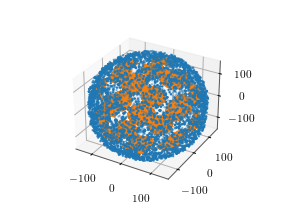

<IPython.core.display.Javascript object>


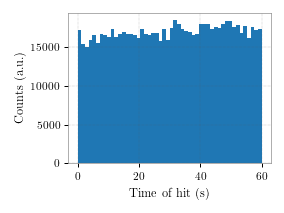

<IPython.core.display.Javascript object>


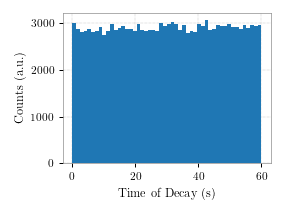

<IPython.core.display.Javascript object>


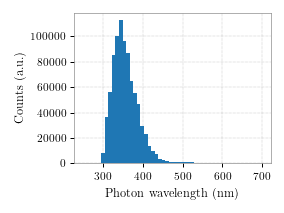

There were 47706.0 starting decays and 145162 total ones
145162


<IPython.core.display.Javascript object>


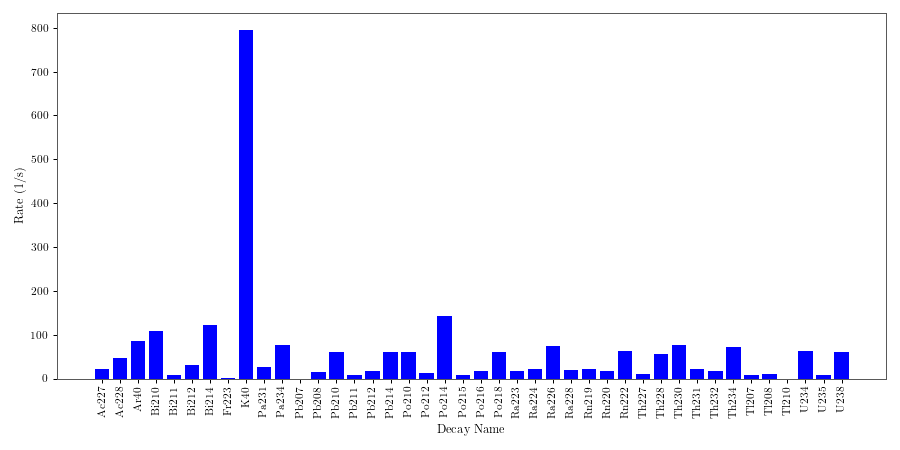

Total module rate: 13364.71666667   Average PMT rate: 556.86 +- 17.00   Eaten by deadtime (10.0ns): 4.16%


<IPython.core.display.Javascript object>


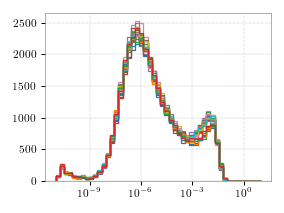

In [6]:
for p in range(0,int(max(PMT)+1)):
    print(sum(DP[PMT==p]))

    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(decay_x[:5000],decay_y[:5000],decay_z[:5000],s=1,color='tab:blue')
ax.scatter(x,y,z,s=0.01,color='tab:orange')
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_zlim(-150, 150)
plt.savefig(generalplotfolder+'1_First5000DecayPositions_mDOM.png')
plt.show()



makeaplot(xlabel='Time of hit (s)', ylabel='Counts (a.u.)')
plt.hist(time,range=(0,duration),bins=50)
finishplot(filename=generalplotfolder + '2_HitTimeHisto_mDOM',png=1,legend=0)

makeaplot(xlabel='Time of Decay (s)', ylabel='Counts (a.u.)')
plt.hist(decay_time,range=(0,duration),bins=50)
finishplot(filename=generalplotfolder+'3_OverallDecayTimeHisto_mDOM',png=1,legend=0)

makeaplot(xlabel='Photon wavelength (nm)', ylabel='Counts (a.u.)')
plt.hist(1239.8 / energy,range=(250,700),bins=50)
finishplot(filename=generalplotfolder+'4_DetectedPhotonWavelengths_mDOM',png=1,legend=0)




print(f"There were {max(decay_eventid)} starting decays and {len(decay_time)} total ones")


unique_names, counts = np.unique(decay_name, return_counts=True)

# Regular expression to remove characters within brackets
base_names = np.array([re.sub(r'\[.*?\]', '', name) for name in unique_names])

# Aggregate the counts by base isotope name
unique_base_names, indices = np.unique(base_names, return_inverse=True)
aggregated_counts = np.zeros(len(unique_base_names), dtype=int)

for i, count in enumerate(counts):
    aggregated_counts[indices[i]] += count
print(sum(aggregated_counts))


plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.bar(unique_base_names, aggregated_counts/duration, color='b')
plt.xlabel('Decay Name')
plt.ylabel('Rate (1/s)')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.savefig(generalplotfolder+'5_OverallDecayrate_mDOM.png')
plt.show()


hits, deadhits, deadtime, alldts, lost, total = gimme(deadtime=10e-9)
print(f'Total module rate: {sum(hits):.8f}   Average PMT rate: {np.mean(hits):.2f} +- {np.std(hits):.2f}   Eaten by deadtime ({deadtime*10**9}ns): {sum(deadhits)/(sum(hits)+sum(deadhits))*100:.2f}%')

makeaplot()
for t in alldts:
    
    min_dt = 1e-11
    max_dt = 10
    bins = np.logspace(np.log10(min_dt), np.log10(max_dt), num=50)    
    plt.hist(t,bins=bins,histtype='step')
plt.xscale('log')
plt.ylim(min_dt)
finishplot(filename=generalplotfolder+'6_dt_mDOM.png',legend=False)


### degg

In [7]:
temperature = -50

fileprefix = "Decays/DEgg_-40"

settingsfile = f"{fileprefix}_args.json"
# Load JSON data directly from file
with open(settingsfile, 'r') as file:
    data = json.load(file)

num_events = data['numevents']
time_window = data['time_window']
duration=num_events*time_window


decayfile = f"{fileprefix}_decays.dat"
hitsfile = f"{fileprefix}_hits.dat"



decay_eventid, decay_time, decay_x, decay_y, decay_z = np.genfromtxt(decayfile,unpack=1,usecols=(0,1,3,4,5))
decay_name = np.genfromtxt(decayfile,unpack=1,usecols=(2),dtype=str)
eventid, time, PMT, energy, x, y, z, PE, TT, DP = np.genfromtxt(hitsfile,unpack=1)#, dtype=np.longdouble)


print(f"Selected {fileprefix}: \n It ran for {duration/60} minutes with roughly {len(DP)/(max(PMT)+1)/duration:.2f} Hz per PMT with {len(DP)} total photons")

Selected Decays/DEgg_-40: 
 It ran for 1.0 minutes with roughly 184.43 Hz per PMT with 22131 total photons


In [8]:
rate = []
for p in np.arange(0,max(PMT)+0.1,1):
    hits = len(DP[PMT==p])
    rate.append(hits/duration)
    print(hits/duration)
print()
print(np.mean(rate))

186.73333333333332
182.11666666666667

184.425


11204.0
10927.0


<IPython.core.display.Javascript object>


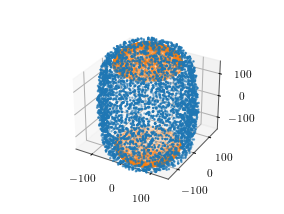

<IPython.core.display.Javascript object>


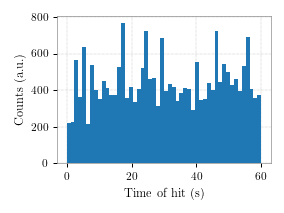

<IPython.core.display.Javascript object>


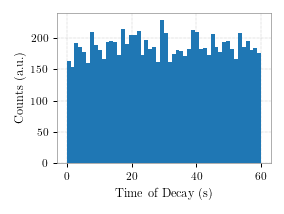

<IPython.core.display.Javascript object>


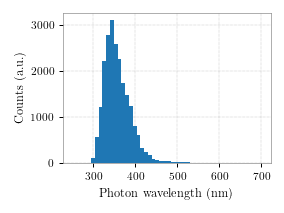

There were 2626.0 starting decays and 9341 total ones
9341


<IPython.core.display.Javascript object>


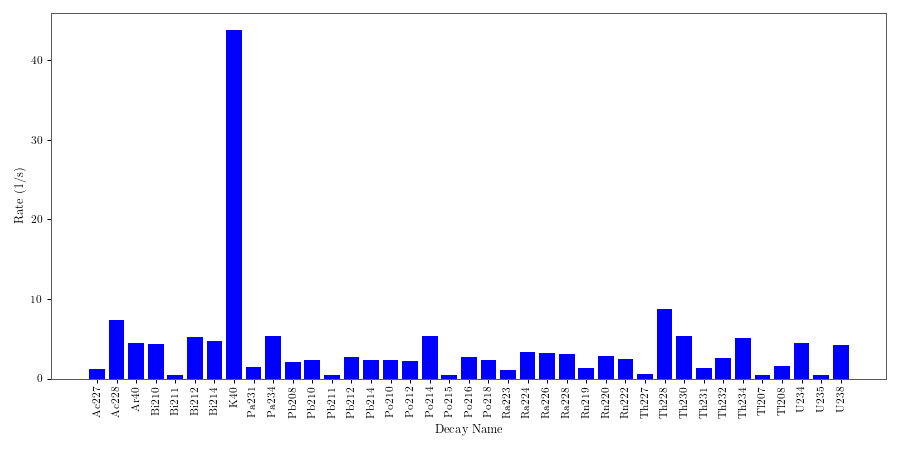

T=-50: Total module rate: 338.71666667   Average PMT rate: 169.36 +- 1.62   Eaten by deadtime (10.0ns): 5.48%


<IPython.core.display.Javascript object>


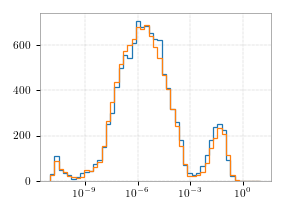

In [9]:
for p in range(0,int(max(PMT)+1)):
    print(sum(DP[PMT==p]))

    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(decay_x[:5000],decay_y[:5000],decay_z[:5000],s=1,color='tab:blue')
ax.scatter(x,y,z,s=0.01,color='tab:orange')
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_zlim(-150, 150)
plt.savefig(generalplotfolder+'1_5000DecaysPositions_dEGG.png')
plt.show()



makeaplot(xlabel='Time of hit (s)', ylabel='Counts (a.u.)')
plt.hist(time,range=(0,duration),bins=50)
finishplot(filename=generalplotfolder+'2_HitTimeHisto_dEGG',png=1,legend=0)

makeaplot(xlabel='Time of Decay (s)', ylabel='Counts (a.u.)')
plt.hist(decay_time,range=(0,duration),bins=50)
finishplot(filename=generalplotfolder+'3_DecayTimeHisto_dEGG',png=1,legend=0)

makeaplot(xlabel='Photon wavelength (nm)', ylabel='Counts (a.u.)')
plt.hist(1239.8 / energy,range=(250,700),bins=50)
finishplot(filename=generalplotfolder+'4_Photons_dEGG',png=1,legend=0)



print(f"There were {max(decay_eventid)} starting decays and {len(decay_time)} total ones")


unique_names, counts = np.unique(decay_name, return_counts=True)

# Regular expression to remove characters within brackets
base_names = np.array([re.sub(r'\[.*?\]', '', name) for name in unique_names])

# Aggregate the counts by base isotope name
unique_base_names, indices = np.unique(base_names, return_inverse=True)
aggregated_counts = np.zeros(len(unique_base_names), dtype=int)

for i, count in enumerate(counts):
    aggregated_counts[indices[i]] += count
print(sum(aggregated_counts))


plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.bar(unique_base_names, aggregated_counts/duration, color='b')
plt.xlabel('Decay Name')
plt.ylabel('Rate (1/s)')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.savefig(generalplotfolder+'5_WhichDecays_dEGG.png')
plt.show()



hits, deadhits, deadtime, alldts, lost, total = gimme(deadtime=10e-9)
print(f'T={temperature}: Total module rate: {sum(hits):.8f}   Average PMT rate: {np.mean(hits):.2f} +- {np.std(hits):.2f}   Eaten by deadtime ({deadtime*10**9}ns): {sum(deadhits)/(sum(hits)+sum(deadhits))*100:.2f}%')

makeaplot()
for t in alldts:
    
    min_dt = 1e-11
    max_dt = 10
    bins = np.logspace(np.log10(min_dt), np.log10(max_dt), num=50)    
    plt.hist(t,bins=bins,histtype='step')
plt.xscale('log')
plt.ylim(min_dt)
finishplot(filename=generalplotfolder+'6_dt_dEGG.png',legend=False)


Everything seems fine

# Compare Modules

In [46]:
def processtemperature(fileprefix, moduledeadtime = 10,printit=False,air=False):
    def gimme(deadtime=10e-9,printline=False):
        hits=[]
        deadhits=[]
        alldts=[]

        total=[]
        lost=[]
        skipped=False

        #plt.figure()
        for p in range(0,int(max(PMT)+1)):
            thistime=time[PMT==p]
            thisdp=DP[PMT==p]
            thisdts=[]

            sortedtime = np.sort(thistime)
            uniquetimes = np.unique(sortedtime)

            if printline:
                percent_lost = (len(sortedtime) - len(uniquetimes)) / len(sortedtime) * 100
                print(f"Lost {len(sortedtime) - len(uniquetimes)}/{len(sortedtime)} due to same time ({percent_lost:.4f} percent)")                
            lost.append(len(sortedtime)-len(uniquetimes))
            total.append(len(sortedtime))
            sortedtime = uniquetimes

            dt=[]
            de=[]
            outsort=[]
            for i in range(1,len(sortedtime)):
                if skipped:
                    currentdt = sortedtime[i]-skippedtime
                else:
                    currentdt = sortedtime[i]-sortedtime[i-1]
                thisdts.append(currentdt)

                #deadtime sorter:
                if currentdt<deadtime:
                    outsort.append(thisdp[i])
                    skipped=True
                    skippedtime=sortedtime[i-1]
                    #print(currentdt)
                    continue
                dt.append(currentdt)
                de.append(thisdp[i])
                skipped=False

            #plt.hist(dt)
            hits.append(sum(de)/duration)
            deadhits.append(sum(outsort)/duration)
            alldts.append(thisdts)
        return hits,deadhits, deadtime, alldts, np.mean(lost), np.mean(total)

    
    simtemprange = np.arange(-50, 1, 10)
    
    temps=[]
    simrate=[]
    simrate_e=[]
    for temp in simtemprange:
        filename = f"{fileprefix}_{temp}"
        
        if air:
            filename = f"{fileprefix}_{temp}_air"
        print(filename)
        
        try:
            settingsfile = f"{filename}_args.json"
            # Load JSON data directly from file
            with open(settingsfile, 'r') as file:
                data = json.load(file)

            num_events = data['numevents']
            time_window = data['time_window']
            duration=num_events*time_window

            eventid, time, PMT, energy, x, y, z, PE, TT, DP = np.genfromtxt(f"{filename}_hits.dat",unpack=1)#, dtype=np.longdouble)

            hits, deadhits, deadtime, alldts, lost, total = gimme(deadtime=moduledeadtime*1e-9,printline=printit)
            print(f"{fileprefix.split('/')[-1].split('_')[0]} with {moduledeadtime}ns deadtime at T={temp}: \t Average PMT rate: {np.mean(hits):.2f} +- {np.std(hits):.2f}\t Eaten by deadtime: {sum(deadhits)/(sum(hits)+sum(deadhits))*100:.2f}%")

            #rate=ufloat(np.mean(hits),np.std(hits))
            #rate = rate*AP2factor + intrinsicPMTrate
            simrate.append(np.mean(hits))
            simrate_e.append(np.std(hits))
            temps.append(temp)
        except Exception as err:
            print(err)
            continue
            
    return np.array(temps), np.array(simrate), np.array(simrate_e)

## mDOM

After rescaling yield

mDOM with 10ns deadtime at T=-50: 	 Average PMT rate: 599.50 +- 17.53	 Eaten by deadtime: 3.96%
mDOM with 10ns deadtime at T=-40: 	 Average PMT rate: 556.86 +- 17.00	 Eaten by deadtime: 4.16%
mDOM with 10ns deadtime at T=-30: 	 Average PMT rate: 483.50 +- 14.00	 Eaten by deadtime: 4.45%
mDOM with 10ns deadtime at T=-20: 	 Average PMT rate: 422.61 +- 11.97	 Eaten by deadtime: 4.73%
mDOM with 10ns deadtime at T=-10: 	 Average PMT rate: 365.63 +- 7.96	 Eaten by deadtime: 5.13%
mDOM with 10ns deadtime at T=0: 	 Average PMT rate: 311.31 +- 9.09	 Eaten by deadtime: 5.63%


<IPython.core.display.Javascript object>


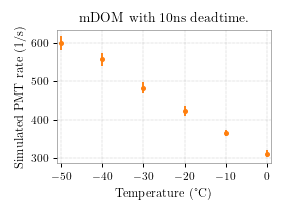

In [12]:
deadtime=10
mdom_vitro_temp, mdom_vitro_rate, mdom_vitro_rate_e = processtemperature('Decays/mDOM',moduledeadtime=deadtime)

makeaplot(xlim=(-51,1),xlabel="Temperature (°C)",ylabel="Simulated PMT rate (1/s)")
plt.title(f"mDOM with {deadtime}ns deadtime.")
plt.errorbar(mdom_vitro_temp, mdom_vitro_rate, mdom_vitro_rate_e, fmt='.', color='tab:orange', label='Vitrovex') 
finishplot(legend=False) 

## Degg

Degg paper: https://arxiv.org/pdf/2212.14526


100 ns deadtime for Fig 12 (in-ice values)

908 1/s per PMT at -40°C 
(870 1/s for DOMs btw)

This is the total value! According to Aya the bare PMT darkrate at -40°C is ~400 1/s 
-> 908-400 = 508 is the reference for -40°C in ice values with 100ns deadtime


measured factor 2.4 between air and ice at -40°C. 

### Measurement

In [7]:
#in air
rate_total = []
rate_intrinsic = []
temperatures = []

In [8]:
#in ice
rate_total = []
rate_intrinsic = []
temperatures = []

### Simulation

Lost 268/11079 due to same time (2.4190 percent)
Lost 282/11520 due to same time (2.4479 percent)
DEgg with 100ns deadtime at T=-50: 	 Average PMT rate: 155.45 +- 3.23	 Eaten by deadtime: 15.39%
Lost 327/11204 due to same time (2.9186 percent)
Lost 300/10927 due to same time (2.7455 percent)
DEgg with 100ns deadtime at T=-40: 	 Average PMT rate: 150.29 +- 2.29	 Eaten by deadtime: 16.12%
Lost 202/9127 due to same time (2.2132 percent)
Lost 253/10023 due to same time (2.5242 percent)
DEgg with 100ns deadtime at T=-30: 	 Average PMT rate: 131.01 +- 5.16	 Eaten by deadtime: 15.90%
Lost 293/9251 due to same time (3.1672 percent)
Lost 199/8290 due to same time (2.4005 percent)
DEgg with 100ns deadtime at T=-20: 	 Average PMT rate: 118.33 +- 6.22	 Eaten by deadtime: 16.70%
Lost 343/9115 due to same time (3.7630 percent)
Lost 282/9004 due to same time (3.1319 percent)
DEgg with 100ns deadtime at T=-10: 	 Average PMT rate: 119.18 +- 0.27	 Eaten by deadtime: 18.24%
Lost 240/8156 due to same time

<IPython.core.display.Javascript object>


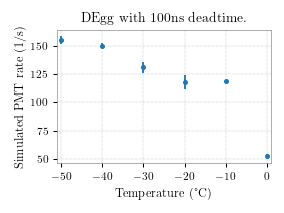

Simulation needs to be increased by a factor of 3.3801 to match


In [10]:
deadtime=100
#degg_oka_temp, degg_oka_rate, degg_oka_rate_e = processtemperature('Decays/DEgg',moduledeadtime=deadtime, printit=True)


makeaplot(xlim=(-51,1),xlabel="Temperature (°C)",ylabel="Simulated PMT rate (1/s)")
plt.title(f"DEgg with {deadtime}ns deadtime.")
plt.errorbar(degg_oka_temp, degg_oka_rate, degg_oka_rate_e, fmt='.', color='tab:blue', label='Okamoto') 
finishplot(legend=False,filename='Degg_notmatching') 

Simulation = degg_oka_rate[degg_oka_temp==-40][0]
Measurement = 508
print(f"Simulation needs to be increased by a factor of {(Measurement/Simulation):.4f} to match")

# Scale isotope concentration

The simulated rates of the D-Egg do not match real-world measurements. We did not perform the Okamoto concentration measurement ourselves, and it lacks an efficiency simulation that would effectively scale the concentration higher. This, alone, will not account for a factor of 3.45 since there are other caveats:

Our scintillation model is very effective for mDOMs/Vitrovex glass, as the yield determination is conducted with a 3-inch PMT that is well-characterized (e.g., afterpulsing and intrinsic dark rate). The PMT simulation within Geant4 is also optimized for 3-inch mDOM PMTs, whereas such detailed characterizations do not exist for the D-Egg PMT.

Furthermore, the scintillation spectrum has only been measured for Vitrovex glass. If the Okamoto spectrum extends significantly further into the UV region, the yield would need to be remeasured using a UV-PMT.

Although this approach deviates from the initial method used in the mDOM scintillation model, scaling the concentration appears to be the only feasible option unless we undertake comprehensive remeasurement for D-Eggs. This would involve wavelength-dependent photocathode scans, reevaluating the Okamoto scintillation spectrum, possibly measuring UV alpha/electron yields, conducting concentration measurements with simulated efficiency, and conducting CAD scans of the internal components for PMT simulation.

## Create new file

values taken from the pdf (japanese measurement with unknown efficiency factor)...U235 was not measured. take same ratio as u235/u235 above

U(Early)214.6 ± 12.9 #U238

U(Late)136.1 ± 0.1 #Ra 226

Th(Early)137.3 ± 1.4 #th232

Th(Late)135.0 ± 0.8 #ra 224

K 2548 ± 16 #K

#these units are mBq not Bq -> divide by 1000.

In [21]:
def create_json_file(scalefactor=1):
    # Define the activity data based on the processed information
    data = {
        "jName": "Radioactivity_Okamoto",
        "jMaterialName": "RiAbs_Glass_Okamoto_DOUMEKI",
        "jConstProperties": {
            "K40_ACTIVITY": {
                "jValue": scalefactor * 2548 / 1000,  # converting mBq to Bq
                "jUnit": "kg",
                "jInvertUnit": ""
            },
            "U238_ACTIVITY": {
                "jValue": scalefactor * 214.6 / 1000,  
                "jUnit": "kg",
                "jInvertUnit": ""
            },
            "U235_ACTIVITY": {
                # U235 is not measured. Use same ratio from Vitrovex glass with U238.
                "jValue": scalefactor * 214.6 * 0.59/4.61 / 1000,  # converting mBq to Bq and assume same ratio as in vitrovex
                "jUnit": "kg",
                "jInvertUnit": ""
            },
            "Th232_ACTIVITY": {
                "jValue": scalefactor * 137.3 / 1000,  # converting mBq to Bq
                "jUnit": "kg",
                "jInvertUnit": ""
            },
            "Ra226_ACTIVITY": {
                "jValue": scalefactor * 136.1 / 1000,  # converting mBq to Bq
                "jUnit": "kg",
                "jInvertUnit": ""
            },
            "Ra224_ACTIVITY": {
                "jValue": scalefactor * 135.0 / 1000,  # converting mBq to Bq
                "jUnit": "kg",
                "jInvertUnit": ""
            }
        }
    }

    # Convert the Python dictionary into a JSON string
    json_data = json.dumps(data, indent=4)

    # Write the JSON data to a file
    with open(f"Extra_Okamoto_radioactivity_factor{scalefactor}.dat", "w") as file:
        file.write(json_data)
    print("File created successfully!")

for f in np.arange(1,6,1):
    create_json_file(f)

File created successfully!
File created successfully!
File created successfully!
File created successfully!
File created successfully!


## Check scaled rates

./OMSim_radioactive_decays --no_PMT_decays --efficiency_cut -n 1 --time_window 20 --temperature -40 -o "Degg_-40C_factor_1" --environment 1 --detector_type 6 --threads 3


Degg_-40C_factor_1 with 100ns deadtime at T=-40: 	 Average PMT rate: 143.60 +- 5.45	 Eaten by deadtime: 15.43%

Degg_-40C_factor_2 with 100ns deadtime at T=-40: 	 Average PMT rate: 303.50 +- 8.50	 Eaten by deadtime: 16.14%

Degg_-40C_factor_3 with 100ns deadtime at T=-40: 	 Average PMT rate: 435.12 +- 12.48	 Eaten by deadtime: 16.00%

Degg_-40C_factor_4 with 100ns deadtime at T=-40: 	 Average PMT rate: 598.30 +- 9.70	 Eaten by deadtime: 15.82%

Degg_-40C_factor_5 with 100ns deadtime at T=-40: 	 Average PMT rate: 726.80 +- 1.20	 Eaten by deadtime: 16.47%



<IPython.core.display.Javascript object>


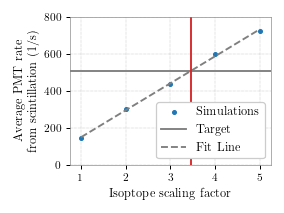

Slope: 146.11999999999998, Intercept: 3.105000000000075, R-squared: 0.998593009840082
Scaling factor needed to reach 508 targetrate: 3.4553449219819328
File created successfully!


In [54]:
from scipy.stats import linregress

PMTrate_40_100 = 908
intensicPMTrate_40 = 400
targetrate = PMTrate_40_100 - intensicPMTrate_40
moduledeadtime = 100

rates=[]
factors=[]
for f in np.arange(1,6,1):
    fileprefix=f'ScalingOkamotoConcentration/Degg_-40C_factor_{f}'
    
    settingsfile = f"{fileprefix}_args.json"
    
    if not os.path.exists(settingsfile):
        break
    
    # Load JSON data directly from file
    with open(settingsfile, 'r') as file:
        data = json.load(file)

    num_events = data['numevents']
    time_window = data['time_window']
    duration=num_events*time_window


    decayfile = f"{fileprefix}_decays.dat"
    hitsfile = f"{fileprefix}_hits.dat"



    decay_eventid, decay_time, decay_x, decay_y, decay_z = np.genfromtxt(decayfile,unpack=1,usecols=(0,1,3,4,5))
    decay_name = np.genfromtxt(decayfile,unpack=1,usecols=(2),dtype=str)
    eventid, time, PMT, energy, x, y, z, PE, TT, DP = np.genfromtxt(hitsfile,unpack=1)#, dtype=np.longdouble)

    hits, deadhits, deadtime, alldts, lost, total =gimme(printline=0,deadtime=moduledeadtime*1e-9)
    print(f"{fileprefix.split('/')[-1]} with {moduledeadtime}ns deadtime at T={data['temperature']}: \t Average PMT rate: {np.mean(hits):.2f} +- {np.std(hits):.2f}\t Eaten by deadtime: {sum(deadhits)/(sum(hits)+sum(deadhits))*100:.2f}%")
    print()
    rates.append(np.mean(hits))
    factors.append(f)
    
    
makeaplot(xlabel='Isoptope scaling factor', ylabel='Average PMT rate \n from scintillation (1/s)', ylim=(0,800), xlim=(0.75,5.25))
plt.plot(factors,rates,'.',label='Simulations',color='tab:blue')
plt.axhline(targetrate,label='Target',color='tab:gray')

# Performing a linear fit
slope, intercept, r_value, p_value, std_err = linregress(factors, rates)
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}")
scaling_factor_to_reach_target = (targetrate - intercept) / slope
print(f"Scaling factor needed to reach {targetrate} targetrate: {scaling_factor_to_reach_target}")

fit_line = intercept + slope * np.array(factors)
plt.plot(factors, fit_line, ls='--', color='tab:gray', label='Fit Line')
plt.axvline(scaling_factor_to_reach_target,color='tab:red')


finishplot()



create_json_file(scaling_factor_to_reach_target)

# After scaling

Lost 274/12905 due to same time (2.1232080588919024 percent)
Lost 287/12811 due to same time (2.2402622746077587 percent)
DEgg with 100ns deadtime at T=-50: 	 Average PMT rate: 536.55 +- 5.25	 Eaten by deadtime: 14.67%
Lost 284/11949 due to same time (2.3767679303707423 percent)
Lost 286/12283 due to same time (2.3284213954245705 percent)
DEgg with 100ns deadtime at T=-40: 	 Average PMT rate: 497.95 +- 4.40	 Eaten by deadtime: 15.82%
Lost 268/12157 due to same time (2.2044912396150367 percent)
Lost 335/10810 due to same time (3.0989824236817762 percent)
DEgg with 100ns deadtime at T=-30: 	 Average PMT rate: 468.93 +- 33.93	 Eaten by deadtime: 16.12%
Lost 299/10596 due to same time (2.8218195545488864 percent)
Lost 259/9847 due to same time (2.630242713516807 percent)
DEgg with 100ns deadtime at T=-20: 	 Average PMT rate: 412.95 +- 14.40	 Eaten by deadtime: 16.92%
Lost 193/8820 due to same time (2.188208616780045 percent)
Lost 202/9484 due to same time (2.1299029945170815 percent)
DEgg 

<IPython.core.display.Javascript object>


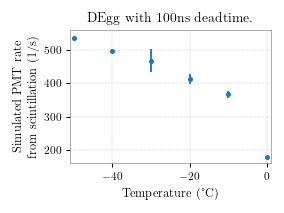

In [49]:
deadtime=100
degg_temp, degg_rate, degg_rate_e = processtemperature('ScaledOkamotoConcentration/DEgg_scaled_20s',moduledeadtime=deadtime, printit=True)


makeaplot(xlim=(-51,1),xlabel="Temperature (°C)",ylabel="Simulated PMT rate \n from scintillation (1/s)")
plt.title(f"DEgg with {deadtime}ns deadtime.")
plt.errorbar(degg_temp, degg_rate, degg_rate_e, fmt='.', color='tab:blue', label='Okamoto') 
finishplot(legend=False) 


The lifetime measurement at 0°C has odd values resulting in a lower rate, this needs investigation! 

But otherwise it seems fine? The lack of comparison data is what is making this complicated.

# Recheck in air

Lost 453/44352 due to same time (1.0214 percent)
Lost 357/42916 due to same time (0.8319 percent)
DEgg with 100ns deadtime at T=-50: 	 Average PMT rate: 1862.40 +- 25.60	 Eaten by deadtime: 13.83%
Lost 317/38458 due to same time (0.8243 percent)
Lost 333/36849 due to same time (0.9037 percent)
DEgg with 100ns deadtime at T=-40: 	 Average PMT rate: 1595.03 +- 31.23	 Eaten by deadtime: 14.54%
Lost 299/36598 due to same time (0.8170 percent)
Lost 349/36666 due to same time (0.9518 percent)
DEgg with 100ns deadtime at T=-30: 	 Average PMT rate: 1546.83 +- 1.33	 Eaten by deadtime: 14.79%
Lost 322/33367 due to same time (0.9650 percent)
Lost 295/30877 due to same time (0.9554 percent)
DEgg with 100ns deadtime at T=-20: 	 Average PMT rate: 1338.30 +- 45.90	 Eaten by deadtime: 15.86%
Lost 359/31588 due to same time (1.1365 percent)
Lost 333/31860 due to same time (1.0452 percent)
DEgg with 100ns deadtime at T=-10: 	 Average PMT rate: 1312.57 +- 3.98	 Eaten by deadtime: 16.34%
Lost 291/27061 du

<IPython.core.display.Javascript object>


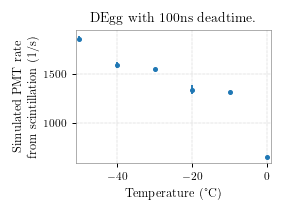

In [68]:
deadtime=100
degg_temp, degg_rate, degg_rate_e = processtemperature('ScaledOkamotoConcentration/DEgg_scaled_air_20s',moduledeadtime=deadtime, printit=True)


makeaplot(xlim=(-51,1),xlabel="Temperature (°C)",ylabel="Simulated PMT rate \n from scintillation (1/s)")
plt.title(f"DEgg with {deadtime}ns deadtime.")
plt.errorbar(degg_temp, degg_rate, degg_rate_e, fmt='.', color='tab:blue', label='Okamoto') 
finishplot(legend=False) 


## Simulated factor air/ice

Lost 274/12905 due to same time (2.1232 percent)
Lost 287/12811 due to same time (2.2403 percent)
DEgg with 100ns deadtime at T=-50: 	 Average PMT rate: 536.55 +- 5.25	 Eaten by deadtime: 14.67%
Lost 284/11949 due to same time (2.3768 percent)
Lost 286/12283 due to same time (2.3284 percent)
DEgg with 100ns deadtime at T=-40: 	 Average PMT rate: 497.95 +- 4.40	 Eaten by deadtime: 15.82%
Lost 268/12157 due to same time (2.2045 percent)
Lost 335/10810 due to same time (3.0990 percent)
DEgg with 100ns deadtime at T=-30: 	 Average PMT rate: 468.93 +- 33.93	 Eaten by deadtime: 16.12%
Lost 299/10596 due to same time (2.8218 percent)
Lost 259/9847 due to same time (2.6302 percent)
DEgg with 100ns deadtime at T=-20: 	 Average PMT rate: 412.95 +- 14.40	 Eaten by deadtime: 16.92%
Lost 193/8820 due to same time (2.1882 percent)
Lost 202/9484 due to same time (2.1299 percent)
DEgg with 100ns deadtime at T=-10: 	 Average PMT rate: 367.35 +- 11.40	 Eaten by deadtime: 17.94%
Lost 232/8947 due to same

<IPython.core.display.Javascript object>


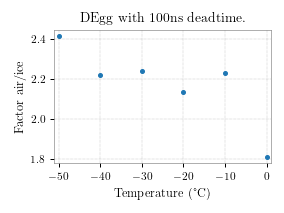

In [77]:
deadtime=100
degg_temp, degg_rate, degg_rate_e = processtemperature('ScaledOkamotoConcentration/DEgg_scaled_20s',moduledeadtime=deadtime, printit=True)
degg_air_temp, degg_air_rate, degg_air_rate_e = processtemperature('ScaledOkamotoConcentration/DEgg_scaled_air_20s',moduledeadtime=deadtime, printit=True)
factor = (degg_air_rate+400)/(degg_rate+400)

makeaplot(xlim=(-51,1),xlabel="Temperature (°C)",ylabel="Factor air/ice")
plt.title(f"DEgg with {deadtime}ns deadtime.")
plt.plot(degg_air_temp, factor, '.', color='tab:blue', label='Ice') 
finishplot(legend=False) 


The mismatch between our simulaition air/ice factor at -40°C of ~2.2 compared to Chibas 2.4 is yet another thing that should be investigated

# new results

In [82]:
x=[590,  790, 850,880,950,990,1050]
y=[1,3,4,7,9,7,1]

z=[]
for xx,yy in zip(x,y):
    for i in range(yy):
        z.append(xx)
        
np.std(z)#/sum(y)



targeticetotal = ufloat(908,87.49)
intrinsicdark=ufloat(400,60)

In [83]:
targeticetotal-intrinsicdark

508.0+/-106.0872287318318

In [ ]:
from uncertainties import unumpy
from uncertainties import ufloat
triggerloss=ufloat(0.98,0.02)
intrinsicdark=ufloat(400,60)
deadtime=100

In [66]:
degg_oka_temp, degg_oka_rate, degg_oka_rate_e = processtemperature('newdata3min/original/DEgg',moduledeadtime=deadtime, printit=True,air=False)

precorr0 = unumpy.uarray(degg_oka_rate,degg_oka_rate_e)
aftercorr0 = precorr0*triggerloss+intrinsicdark

newdata3min/original/DEgg_-50
Lost 790/32141 due to same time (2.4579 percent)
Lost 892/34868 due to same time (2.5582 percent)
DEgg with 100ns deadtime at T=-50: 	 Average PMT rate: 154.29 +- 6.14	 Eaten by deadtime: 14.97%
newdata3min/original/DEgg_-40
Lost 829/31517 due to same time (2.6303 percent)
Lost 903/32331 due to same time (2.7930 percent)
DEgg with 100ns deadtime at T=-40: 	 Average PMT rate: 145.26 +- 1.86	 Eaten by deadtime: 15.81%
newdata3min/original/DEgg_-30
Lost 761/28810 due to same time (2.6414 percent)
Lost 795/30924 due to same time (2.5708 percent)
DEgg with 100ns deadtime at T=-30: 	 Average PMT rate: 136.46 +- 4.66	 Eaten by deadtime: 15.56%
newdata3min/original/DEgg_-20
Lost 790/28233 due to same time (2.7981 percent)
Lost 756/26083 due to same time (2.8984 percent)
DEgg with 100ns deadtime at T=-20: 	 Average PMT rate: 121.47 +- 5.37	 Eaten by deadtime: 17.13%
newdata3min/original/DEgg_-10
Lost 837/25861 due to same time (3.2365 percent)
Lost 724/25660 due to

<IPython.core.display.Javascript object>


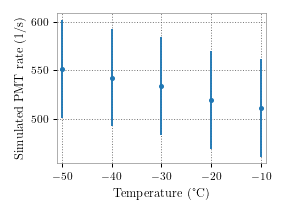

off by: 0.60+/-0.06


In [68]:
makeaplot(xlim=(-51,-9),xlabel="Temperature (°C)",ylabel="Simulated PMT rate (1/s)")
#plt.title(f"DEgg with {deadtime}ns deadtime.")
#plt.errorbar(degg_oka_temp[:-1], degg_oka_rate[:-1], degg_oka_rate_e[:-1], fmt='.', color='tab:blue', label='Okamoto') 
plt.errorbar(degg_oka_temp[:-1], unumpy.nominal_values(aftercorr0[:-1]), unumpy.std_devs(aftercorr0[:-1]), fmt='.', color='tab:blue', label='Okamoto') 

finishplot(legend=False,filename='Degg_notmatching_ice') 


print("off by:", (aftercorr0[1]/908))

In [39]:

deadtime=100
degg_oka_temp, degg_oka_rate, degg_oka_rate_e = processtemperature('newdata3min/original/DEgg',moduledeadtime=deadtime, printit=True,air=True)


precorr = unumpy.uarray(degg_oka_rate,degg_oka_rate_e)

triggerloss=ufloat(0.98,0.02)
intrinsicdark=ufloat(400,50)

aftercorr = precorr*triggerloss+intrinsicdark

Lost 1166/110315 due to same time (1.0570 percent)
Lost 1012/109054 due to same time (0.9280 percent)
DEgg with 100ns deadtime at T=-50: 	 Average PMT rate: 519.19 +- 2.77	 Eaten by deadtime: 13.94%
Lost 1145/102276 due to same time (1.1195 percent)
Lost 1010/97994 due to same time (1.0307 percent)
DEgg with 100ns deadtime at T=-40: 	 Average PMT rate: 472.19 +- 9.44	 Eaten by deadtime: 14.20%
Lost 1028/93099 due to same time (1.1042 percent)
Lost 1023/92338 due to same time (1.1079 percent)
DEgg with 100ns deadtime at T=-30: 	 Average PMT rate: 434.44 +- 2.13	 Eaten by deadtime: 14.72%
Lost 979/81842 due to same time (1.1962 percent)
Lost 870/83687 due to same time (1.0396 percent)
DEgg with 100ns deadtime at T=-20: 	 Average PMT rate: 384.06 +- 3.74	 Eaten by deadtime: 15.53%
Lost 895/80974 due to same time (1.1053 percent)
Lost 930/77308 due to same time (1.2030 percent)
DEgg with 100ns deadtime at T=-10: 	 Average PMT rate: 363.12 +- 7.53	 Eaten by deadtime: 16.45%
Lost 971/74229 d

<IPython.core.display.Javascript object>


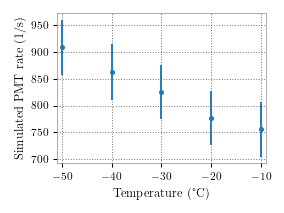

off by: 0.479+/-0.029


In [69]:
makeaplot(xlim=(-51,-9),xlabel="Temperature (°C)",ylabel="Simulated PMT rate (1/s)")
#plt.title(f"DEgg with {deadtime}ns deadtime.")
#plt.errorbar(degg_oka_temp[:-1], degg_oka_rate[:-1], degg_oka_rate_e[:-1], fmt='.', color='tab:blue', label='Okamoto') 
plt.errorbar(degg_oka_temp[:-1], unumpy.nominal_values(aftercorr[:-1]), unumpy.std_devs(aftercorr[:-1]), fmt='.', color='tab:blue', label='Okamoto') 

finishplot(legend=False,filename='Degg_notmatching_air') 


print("off by:", (aftercorr[1]/1800))

In [52]:
deadtime=100
degg_oka_temp, degg_oka_rate, degg_oka_rate_e = processtemperature('newdata3min/scaled/DEgg',moduledeadtime=deadtime, printit=True,air=True)

precorr2 = unumpy.uarray(degg_oka_rate,degg_oka_rate_e)

triggerloss=ufloat(0.98,0.02)
intrinsicdark=ufloat(400,50)

aftercorr2 = precorr2*triggerloss+intrinsicdark

newdata3min/scaled/DEgg_-50_air
Lost 3929/380365 due to same time (1.0330 percent)
Lost 3860/375711 due to same time (1.0274 percent)
DEgg with 100ns deadtime at T=-50: 	 Average PMT rate: 1792.63 +- 10.77	 Eaten by deadtime: 13.76%
newdata3min/scaled/DEgg_-40_air
Lost 3647/351374 due to same time (1.0379 percent)
Lost 3529/344856 due to same time (1.0233 percent)
DEgg with 100ns deadtime at T=-40: 	 Average PMT rate: 1638.96 +- 14.26	 Eaten by deadtime: 14.37%
newdata3min/scaled/DEgg_-30_air
Lost 3694/321207 due to same time (1.1500 percent)
Lost 3391/314389 due to same time (1.0786 percent)
DEgg with 100ns deadtime at T=-30: 	 Average PMT rate: 1488.93 +- 13.75	 Eaten by deadtime: 14.72%
newdata3min/scaled/DEgg_-20_air
Lost 3258/299476 due to same time (1.0879 percent)
Lost 3178/294776 due to same time (1.0781 percent)
DEgg with 100ns deadtime at T=-20: 	 Average PMT rate: 1379.20 +- 10.61	 Eaten by deadtime: 15.53%
newdata3min/scaled/DEgg_-10_air
Lost 3065/277138 due to same time (1

<IPython.core.display.Javascript object>


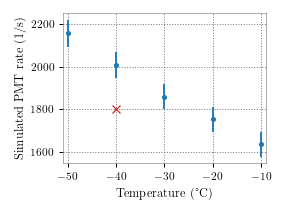

In [64]:

makeaplot(xlim=(-51,-9),xlabel="Temperature (°C)",ylabel="Simulated PMT rate (1/s)")
#plt.title(f"DEgg with {deadtime}ns deadtime.")
#plt.errorbar(degg_oka_temp[:-1], degg_oka_rate[:-1], degg_oka_rate_e[:-1], fmt='.', color='tab:blue', label='Okamoto') 
plt.errorbar(degg_oka_temp[:-1], unumpy.nominal_values(aftercorr2[:-1]), unumpy.std_devs(aftercorr2[:-1]), fmt='.', color='tab:blue', label='Okamoto') 

plt.plot(-40,1800,'x',color='tab:red')

finishplot(legend=False,filename='Degg_scaledRates_air') 


In [48]:
deadtime=100
degg_oka_temp, degg_oka_rate, degg_oka_rate_e = processtemperature('newdata3min/scaled/DEgg',moduledeadtime=deadtime, printit=True,air=False)

precorr3 = unumpy.uarray(degg_oka_rate,degg_oka_rate_e)

triggerloss=ufloat(0.98,0.02)
intrinsicdark=ufloat(400,50)

aftercorr3 = precorr3*triggerloss+intrinsicdark

newdata3min/scaled/DEgg_-50
Lost 3298/120193 due to same time (2.7439 percent)
Lost 3188/117954 due to same time (2.7027 percent)
DEgg with 100ns deadtime at T=-50: 	 Average PMT rate: 547.12 +- 6.42	 Eaten by deadtime: 14.98%
newdata3min/scaled/DEgg_-40
Lost 3298/113450 due to same time (2.9070 percent)
Lost 3048/112410 due to same time (2.7115 percent)
DEgg with 100ns deadtime at T=-40: 	 Average PMT rate: 513.67 +- 2.51	 Eaten by deadtime: 15.76%
newdata3min/scaled/DEgg_-30
Lost 2752/98780 due to same time (2.7860 percent)
Lost 2900/100588 due to same time (2.8830 percent)
DEgg with 100ns deadtime at T=-30: 	 Average PMT rate: 453.21 +- 2.91	 Eaten by deadtime: 15.78%
newdata3min/scaled/DEgg_-20
Lost 2697/94649 due to same time (2.8495 percent)
Lost 2691/93954 due to same time (2.8642 percent)
DEgg with 100ns deadtime at T=-20: 	 Average PMT rate: 421.15 +- 2.49	 Eaten by deadtime: 17.25%
newdata3min/scaled/DEgg_-10
Lost 2808/88697 due to same time (3.1658 percent)
Lost 2642/84855 d

<IPython.core.display.Javascript object>


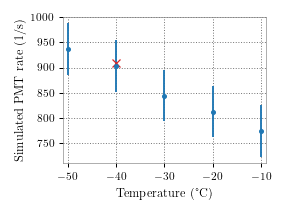

In [63]:
makeaplot(xlim=(-51,-9),xlabel="Temperature (°C)",ylabel="Simulated PMT rate (1/s)")
#plt.title(f"DEgg with {deadtime}ns deadtime.")
#plt.errorbar(degg_oka_temp[:-1], degg_oka_rate[:-1], degg_oka_rate_e[:-1], fmt='.', color='tab:blue', label='Okamoto') 
plt.errorbar(degg_oka_temp[:-1], unumpy.nominal_values(aftercorr3[:-1]), unumpy.std_devs(aftercorr3[:-1]), fmt='.', color='tab:blue', label='Okamoto') 

plt.plot(-40,908,'x',color='tab:red')

finishplot(legend=False,filename='Degg_scaledRates_ice') 
